# Parcial 1 (Tipo A)
- Deben mantener la cámara encendida a lo largo del parcial.
- El examen tiene una duración máxima de 2 horas 50 minutos y se debe subir a Bloque Neón antes de las 8:55pm del 28 de septiembre del 2022.
- Esta prueba es INDIVIDUAL. El intercambio de información con otro estudiante por cualquier medio está terminantemente prohibido. Cualquier irregularidad con respecto a la regla anterior será considerada fraude.
- Responda el examen en los espacios proporcionados. Cada pregunta tiene una celda de respuesta marcada.
- IMPORTANTE: Soy consciente de que cualquier tipo de fraude en los exámenes es considerado como una falta grave en la Universidad. Al entregar este examen doy expreso testimonio de que este trabajo fue desarrollado de acuerdo con las normas establecidas. Del mismo modo, aseguro que no participe en ningún tipo de fraude.
- Materiales y herramientas permitidas en el parcial: 
Puede usar las presentaciones/talleres de clase. Puede usar calculadora para solucionar puntos que requieran calculo.



## Punto 1: Ejercicio práctico (60 pts)

Una corporación bancaria le entrega información sobre clientes a los cuales se les ha realizado o se le ha rechazado un prestamo. Le piden a ud que entrene un modelo de ML con esos datos con el fin de clasificar a los clientes y ahorrar tiempo para futuros prestamos.

El dataset contiene los siguientes datos:
* ApplicantIncome: Ingresos del solicitante.
* CoapplicantIncome: Ingresos del co-aplicante.
* LoanAmount: Monto del prestamo.
* Loan_Amount_Term: El plazo de devolución del préstamo (en días).
* Credit_History: Registros de historial de crédito anterior (0: mal historial crediticio, 1: buen historial crediticio).
* Gender: Género.
* Married: Si es casado.
* Dependents_0,Dependents_1,Dependents_2,Dependents_3+ : Booleano para definir el numero de miembros en la familia.
* Education: Applicant education/qualification.
* Self_Employed: Situación laboral del solicitante.
* Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban: Booleano para definir la ubicacion de la propiedad.
* Loan_Status: Estado del préstamo (1: aceptado, 0: no aceptado).

In [ ]:
# POR FAVOR, NO AGREGAR NI ELIMINAR LIBRERIAS. TODAS LAS FUNCIONALIDADES NECESARIAS ESTAN INCLUIDAS EN LAS LIBRERIAS QUE ESTAN ESTIPULADAS EN ESTA CELDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### 1.1. Análisis y preparación de los datos de los datos (9 pts)

1.1.1 Econtrar nulos, ver si el dataset esta balanceado, encontrar columnas que no aporten al problema (3pts)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/juanalvarez123/ISIS-4219-parcial-1/main/Dataset/Prestamo_Bancario.csv')

# El dataset no tiene nulos
df.isnull().sum()

# El dataset está balanceado
df['Loan_Status'].value_counts()
'''
yes    112
no     112
Name: Loan_Status, dtype: int64
'''

# La columnas "Loan_Amount_Term", "Credit_History", "Gender", "Dependents_0",
# "Dependents_1", "Dependents_2", "Dependents_3+", "Education" y "Self_Employed"
# tienen un único valor, esas columnas se pueden eliminar, por ejemplo "Gender"
# tiene solo el valor 'm'
df['Gender'].unique()
'''
array(['m'], dtype=object)
'''

# Elimino las columnas
df.drop('Loan_Amount_Term', axis=1, inplace=True)
df.drop('Credit_History', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.drop('Dependents_0', axis=1, inplace=True)
df.drop('Dependents_1', axis=1, inplace=True)
df.drop('Dependents_2', axis=1, inplace=True)
df.drop('Dependents_3+', axis=1, inplace=True)
df.drop('Education', axis=1, inplace=True)
df.drop('Self_Employed', axis=1, inplace=True)

# Solo "Loan_Status" tiene valores categóricos, voy a transformarlos para que
# sean cuantificables
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: True if x == 'yes' else False)

# Imprimo el dataset actualizado
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Married,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,12.100089,0,0,0,1,True
1,77.459667,0.000000,11.874342,0,0,0,1,True
2,43.046487,53.291650,10.677078,0,1,0,0,False
3,70.356236,0.000000,11.180340,0,0,0,1,True
4,50.990195,59.160798,10.723805,1,0,0,1,True


1.1.2 Separación de variable dependiente e independiente y separación de dataset en entrenmiento y prueba (3pts)

**NOTA**: El conjunto de entrenamiento tendra el 75% de los datos, <<<< IMPORTANTE random_state = 2 >>>>

In [ ]:
x = df.drop('Loan_Status', axis=1, inplace=False)
y = df['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=2)

1.1.3 Aplicar encoding(OneHot, LabelEncoder, Ordinal) a los datos(si es necesario) y estandarizarlos (3pts)  

In [ ]:
# No es necesario aplicar encoding, solo la columna "Loan_Status" tenía valores
# categóricos y ya fueron actualizados en el punto 1.1.1

# Es necesario hacer la estandarización de valores
x_columns_names = x.columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train.values) # Solo para datos de entrenamiento se utiliza "fit_transform"
x_test = sc.transform(x_test.values)

# Los datos se transforman a dataframes para mayor comodidad
x_train = pd.DataFrame(data=x_train, columns=x_columns_names)
x_test = pd.DataFrame(data=x_test, columns=x_columns_names)

# Se imprimen los tamaños de los datasets
print(f'Train: {x_train.shape}')
print(f'Test: {x_test.shape}')

Train: (168, 7)
Test: (56, 7)


### 1.2. Cross-validation (11 pts)


1.2.1 Realizar cross-validation con LogisticRegression(max_inter=500), RandomForest(n_estimator=500) y SVC(max_iter=500) usando 3-Folds. Definir las métricas a utilizar para comparar los modelos(usar 2 y Explicar el porqué) (6pts)

In [ ]:
# Inicio con LogisticRegression
logistic_regression = LogisticRegression(max_iter=500)
logistic_regression.fit(x_train, y_train)

# Continuo con RandomForest
random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(x_train, y_train)

# Sigo con SVC
svc = SVC(max_iter=500)
svc.fit(x_train, y_train)

'''
Las métricas a utilizar son recall y accuracy, las razones:
* Elijo recall debido a que deseo minimizar los falsos negativos, es decir, clientes a los que no les debí haber hecho un préstamo.
* Elijo accuracy debido a que los datos están balanceados y la métrica trabaja bien con datos balanceados.
'''

# Aplico cross validation
cv_results_LR = cross_validate(logistic_regression, x_train, y_train, scoring=('recall', 'accuracy'), cv=3)
cv_results_RF = cross_validate(random_forest, x_train, y_train, scoring=('recall', 'accuracy'), cv=3)
cv_results_SVC = cross_validate(svc, x_train, y_train, scoring=('recall', 'accuracy'), cv=3)

1.2.2 Imprimir los resultados obtenidos para cada modelo y seleccionar el mejor(Explicar el porqué) (5pts)

In [ ]:
# Imprimo los resultados
def print_cross_validation_results(cv_results_LR, cv_results_RF, cv_results_SVC):
  print(f'''
  Scores LogisticRegression:
  Recall: {cv_results_LR['test_recall']}
  Accuracy: {cv_results_LR['test_accuracy']}''')

  print(f'''
  Scores RandomForest:
  Recall: {cv_results_RF['test_recall']}
  Accuracy: {cv_results_RF['test_accuracy']}''')

  print(f'''
  Scores SVC:
  Recall: {cv_results_SVC['test_recall']}
  Accuracy: {cv_results_SVC['test_accuracy']}''')

print_cross_validation_results(cv_results_LR, cv_results_RF, cv_results_SVC)

# El mejor modelo es el construido con SVC ya que tiene los mejores valores
# para "recall" y "accuracy" comparados contra LogisticRegression y RandomForest


  Scores LogisticRegression:
  Recall: [0.88888889 0.74074074 0.77777778]
  Accuracy: [0.85714286 0.76785714 0.71428571]

  Scores RandomForest:
  Recall: [0.81481481 0.77777778 0.59259259]
  Accuracy: [0.82142857 0.80357143 0.73214286]

  Scores SVC:
  Recall: [0.62962963 0.85185185 0.81481481]
  Accuracy: [0.73214286 0.82142857 0.76785714]


### 1.3. Grid-Search (15 pts)

1.3.1 Definir 3 hiper-parámetros cada uno con 2 valores diferentes (5pts)

In [ ]:
parameters = {
    'C': [1.0, 5.0],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

1.3.2 Aplicar gridSearch al mejor modelo encondrado en el punto 1.2, usar las mismas métricas implementadas en cross-validation, seleccionar la mas importante y usarla en el parámetro 'refit', aplicar 3-folds al grid (5pts)

In [ ]:
grid = GridSearchCV(estimator = svc,
                    param_grid = parameters,
                    scoring = ['recall', 'accuracy'],
                    refit = 'accuracy',
                    verbose = 4,
                    cv = 3)

# Iniciar el entrenamiento
grid.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END C=1.0, gamma=scale, kernel=rbf; accuracy: (test=0.732) recall: (test=0.630) total time=   0.0s
[CV 2/3] END C=1.0, gamma=scale, kernel=rbf; accuracy: (test=0.821) recall: (test=0.852) total time=   0.0s
[CV 3/3] END C=1.0, gamma=scale, kernel=rbf; accuracy: (test=0.768) recall: (test=0.815) total time=   0.0s
[CV 1/3] END C=1.0, gamma=scale, kernel=poly; accuracy: (test=0.750) recall: (test=0.630) total time=   0.0s
[CV 2/3] END C=1.0, gamma=scale, kernel=poly; accuracy: (test=0.768) recall: (test=0.704) total time=   0.0s
[CV 3/3] END C=1.0, gamma=scale, kernel=poly; accuracy: (test=0.768) recall: (test=0.778) total time=   0.0s
[CV 1/3] END C=1.0, gamma=auto, kernel=rbf; accuracy: (test=0.732) recall: (test=0.630) total time=   0.0s
[CV 2/3] END C=1.0, gamma=auto, kernel=rbf; accuracy: (test=0.821) recall: (test=0.852) total time=   0.0s
[CV 3/3] END C=1.0, gamma=auto, kernel=rbf; accuracy: (test=0.768) recall: 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


GridSearchCV(cv=3, estimator=SVC(max_iter=500),
             param_grid={'C': [1.0, 5.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             refit='accuracy', scoring=['recall', 'accuracy'], verbose=4)

1.3.3 Imprimir los mejores hiper-parámetros del mejor modelo encontrado con gridSearch (5pts)

In [ ]:
print(f'Los parámetros del mejor modelo son: {grid.best_params_}')

Los parámetros del mejor modelo son: {'C': 5.0, 'gamma': 'scale', 'kernel': 'rbf'}


### 1.4. Análisis de resultados (25 pts)

1.4.1 Realizar las predicciones del modelo encontrado en el punto 1.3 en el set de entrenamiento y de prueba, imprimir las métricas de Recall, Precisión, f1, Accuracy y la matriz de confunsión. (5pts)

Métricas en test
Sensibilidad (Recall): 0.7741935483870968
Precisión: 0.8571428571428571
Accuracy: 0.8035714285714286
Score f1: 0.8135593220338982

Todas las métricas:
              precision    recall  f1-score   support

       False       0.75      0.84      0.79        25
        True       0.86      0.77      0.81        31

    accuracy                           0.80        56
   macro avg       0.80      0.81      0.80        56
weighted avg       0.81      0.80      0.80        56



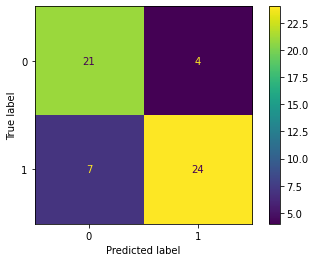

Métricas en train
Sensibilidad (Recall): 0.9012345679012346
Precisión: 0.8795180722891566
Accuracy: 0.8928571428571429
Score f1: 0.8902439024390244

Todas las métricas:
              precision    recall  f1-score   support

       False       0.91      0.89      0.90        87
        True       0.88      0.90      0.89        81

    accuracy                           0.89       168
   macro avg       0.89      0.89      0.89       168
weighted avg       0.89      0.89      0.89       168



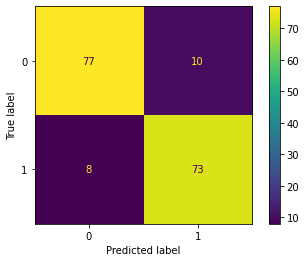

In [ ]:
# Se define una función para tener disponibles todas las métricas
def display_metrics(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    pres = precision_score(y_true, y_pred)
    accur = accuracy_score(y_true, y_pred)
    f1_scr = f1_score(y_true, y_pred)
    conf_mtx = confusion_matrix(y_true, y_pred)
    all_metric = classification_report(y_true, y_pred)

    print(f'Sensibilidad (Recall): {recall}')
    print(f'Precisión: {pres}')
    print(f'Accuracy: {accur}')
    print(f'Score f1: {f1_scr}')
    print('')
    print('Todas las métricas:')
    print(all_metric)
    disp = ConfusionMatrixDisplay(conf_mtx)
    disp.plot()
    plt.show()

# Se hace la predicción
y_pred = grid.predict(x_train)
y_pred_test = grid.predict(x_test)

# Métricas en test
print('Métricas en test')
display_metrics(y_test, y_pred_test)

# Métricas en train
print('Métricas en train')
display_metrics(y_train, y_pred)

1.4.2 Analize los resultados obtenidos del punto 1.4.1, ¿Que haría usted para mejorar el resultado?, mencione por lo menos 3 estrategias diferentes (7 pts).

# Respuesta a la pregunta 1.4.2

Conclusiones del punto anterior:
1. Se obtuvieron mejores métricas en train.
2. Los valores de las métricas no se acercan a 1, sin embargo están casi aproximadas a 0.9, lo cual significa que los valores son buenos.
3. Se puede observar en las matrices de confusión que aún quedan valores por fuera de los true positives y los true negatives pero son muy pocos, lo que quiere decir que el modelo está prediciendo bien los datos.

¿Qué haría para mejorar los resultados?
1. Usar el modelo con RandomForest agregando `max_depth` como hiperparámetro, al usarlo con el valor por defecto "None" posiblemente estoy obteniendo *overfitting*.
2. Usar PCA para reducir la dimensionalidad.
3. Usar más combinaciones de hiperparámetros que me permitan evaluar más combinaciones posibles.

1.4.3 Aplique las estrategias propuestas en 1.4.2 y comparar los resultados (13 pts).

In [ ]:
# Propuesta 1: RandomForest agregando max_depth=50
random_forest_max_depth = RandomForestClassifier(n_estimators=500, max_depth=50)
random_forest_max_depth.fit(x_train, y_train)

# Aplico cross validation junto con los otros modelos
cv_results_LR = cross_validate(logistic_regression, x_train, y_train, scoring=('recall', 'accuracy'), cv=3)
cv_results_RF_max_depth = cross_validate(random_forest_max_depth, x_train, y_train, scoring=('recall', 'accuracy'), cv=3)
cv_results_SVC = cross_validate(svc, x_train, y_train, scoring=('recall', 'accuracy'), cv=3)

# Imprimo los resultados
print_cross_validation_results(cv_results_LR, cv_results_RF_max_depth, cv_results_SVC)

# Aunque se aplica max_depth=50 se observa que el modelo que sigue ganando es el
# hecho con SVC


  Scores LogisticRegression:
  Recall: [0.88888889 0.74074074 0.77777778]
  Accuracy: [0.85714286 0.76785714 0.71428571]

  Scores RandomForest:
  Recall: [0.81481481 0.74074074 0.62962963]
  Accuracy: [0.80357143 0.80357143 0.75      ]

  Scores SVC:
  Recall: [0.62962963 0.85185185 0.81481481]
  Accuracy: [0.73214286 0.82142857 0.76785714]


In [ ]:
# Propuesta 2: Usar PCA para reducir la dimensionalidad
from sklearn.decomposition import PCA

# Retengo un 90% de la varianza
pca = PCA(.90)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

# Nuevamente inicio con LogisticRegression
logistic_regression_pca = LogisticRegression(max_iter=500)
logistic_regression_pca.fit(x_train_pca, y_train)

# Continuo con RandomForest y aplicando max_depth=50
random_forest_pca = RandomForestClassifier(n_estimators=500, max_depth=50)
random_forest_pca.fit(x_train_pca, y_train)

# Sigo con SVC y aplicando los parámetros encontrados con GridSearch
svc_pca = SVC(max_iter = 500, C=5.0, gamma='scale', kernel='rbf')
svc_pca.fit(x_train_pca, y_train)

# Aplico cross validation
cv_results_LR_pca = cross_validate(logistic_regression_pca, x_train_pca, y_train, scoring=('recall', 'accuracy'), cv=3)
cv_results_RF_pca = cross_validate(random_forest_pca, x_train_pca, y_train, scoring=('recall', 'accuracy'), cv=3)
cv_results_SVC_pca = cross_validate(svc_pca, x_train_pca, y_train, scoring=('recall', 'accuracy'), cv=3)

# Imprimo los resultados
print_cross_validation_results(cv_results_LR_pca, cv_results_RF_pca, cv_results_SVC_pca)

# Se puede observar que sigue siendo el modelo con SVC el ganador en las métricas


  Scores LogisticRegression:
  Recall: [0.7037037  0.62962963 0.7037037 ]
  Accuracy: [0.78571429 0.625      0.71428571]

  Scores RandomForest:
  Recall: [0.85185185 0.66666667 0.62962963]
  Accuracy: [0.82142857 0.73214286 0.73214286]

  Scores SVC:
  Recall: [0.62962963 0.81481481 0.74074074]
  Accuracy: [0.73214286 0.78571429 0.75      ]


In [ ]:
# Usar más combinaciones de hiperparámetros
parameters = {
    'C': [1.0, 5.0, 10],
    'kernel': ['rbf', 'poly', 'linear'],
    'gamma': ['scale', 'auto'],
    'max_iter': [100, 200, 300, 500]
}

grid = GridSearchCV(estimator = svc,
                    param_grid = parameters,
                    scoring = ['recall', 'accuracy'],
                    refit = 'accuracy',
                    verbose = 4,
                    cv = 3)

# Iniciar el entrenamiento
grid.fit(x_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END C=1.0, gamma=scale, kernel=rbf, max_iter=100; accuracy: (test=0.732) recall: (test=0.630) total time=   0.0s
[CV 2/3] END C=1.0, gamma=scale, kernel=rbf, max_iter=100; accuracy: (test=0.821) recall: (test=0.852) total time=   0.0s
[CV 3/3] END C=1.0, gamma=scale, kernel=rbf, max_iter=100; accuracy: (test=0.768) recall: (test=0.815) total time=   0.0s
[CV 1/3] END C=1.0, gamma=scale, kernel=rbf, max_iter=200; accuracy: (test=0.732) recall: (test=0.630) total time=   0.0s
[CV 2/3] END C=1.0, gamma=scale, kernel=rbf, max_iter=200; accuracy: (test=0.821) recall: (test=0.852) total time=   0.0s
[CV 3/3] END C=1.0, gamma=scale, kernel=rbf, max_iter=200; accuracy: (test=0.768) recall: (test=0.815) total time=   0.0s
[CV 1/3] END C=1.0, gamma=scale, kernel=rbf, max_iter=300; accuracy: (test=0.732) recall: (test=0.630) total time=   0.0s
[CV 2/3] END C=1.0, gamma=scale, kernel=rbf, max_iter=300; accuracy: (test=0.821) re

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).

[CV 3/3] END C=1.0, gamma=scale, kernel=poly, max_iter=300; accuracy: (test=0.768) recall: (test=0.778) total time=   0.0s
[CV 1/3] END C=1.0, gamma=scale, kernel=poly, max_iter=500; accuracy: (test=0.750) recall: (test=0.630) total time=   0.0s
[CV 2/3] END C=1.0, gamma=scale, kernel=poly, max_iter=500; accuracy: (test=0.768) recall: (test=0.704) total time=   0.0s
[CV 3/3] END C=1.0, gamma=scale, kernel=poly, max_iter=500; accuracy: (test=0.768) recall: (test=0.778) total time=   0.0s
[CV 1/3] END C=1.0, gamma=scale, kernel=linear, max_iter=100; accuracy: (test=0.839) recall: (test=0.815) total time=   0.0s
[CV 2/3] END C=1.0, gamma=scale, kernel=linear, max_iter=100; accuracy: (test=0.679) recall: (test=0.556) total time=   0.0s
[CV 3/3] END C=1.0, gamma=scale, kernel=linear, max_iter=100; accuracy: (test=0.750) recall: (test=0.741) total time=   0.0s
[CV 1/3] END C=1.0, gamma=scale, kernel=linear, max_iter=200; accuracy: (test=0.839) recall: (test=0.815) total time=   0.0s
[CV 2/3]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).

[CV 1/3] END C=1.0, gamma=auto, kernel=rbf, max_iter=200; accuracy: (test=0.732) recall: (test=0.630) total time=   0.0s
[CV 2/3] END C=1.0, gamma=auto, kernel=rbf, max_iter=200; accuracy: (test=0.821) recall: (test=0.852) total time=   0.0s
[CV 3/3] END C=1.0, gamma=auto, kernel=rbf, max_iter=200; accuracy: (test=0.768) recall: (test=0.815) total time=   0.0s
[CV 1/3] END C=1.0, gamma=auto, kernel=rbf, max_iter=300; accuracy: (test=0.732) recall: (test=0.630) total time=   0.0s
[CV 2/3] END C=1.0, gamma=auto, kernel=rbf, max_iter=300; accuracy: (test=0.821) recall: (test=0.852) total time=   0.0s
[CV 3/3] END C=1.0, gamma=auto, kernel=rbf, max_iter=300; accuracy: (test=0.768) recall: (test=0.815) total time=   0.0s
[CV 1/3] END C=1.0, gamma=auto, kernel=rbf, max_iter=500; accuracy: (test=0.732) recall: (test=0.630) total time=   0.0s
[CV 2/3] END C=1.0, gamma=auto, kernel=rbf, max_iter=500; accuracy: (test=0.821) recall: (test=0.852) total time=   0.0s
[CV 3/3] END C=1.0, gamma=auto, 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).

[CV 3/3] END C=1.0, gamma=auto, kernel=poly, max_iter=500; accuracy: (test=0.768) recall: (test=0.778) total time=   0.0s
[CV 1/3] END C=1.0, gamma=auto, kernel=linear, max_iter=100; accuracy: (test=0.839) recall: (test=0.815) total time=   0.0s
[CV 2/3] END C=1.0, gamma=auto, kernel=linear, max_iter=100; accuracy: (test=0.679) recall: (test=0.556) total time=   0.0s
[CV 3/3] END C=1.0, gamma=auto, kernel=linear, max_iter=100; accuracy: (test=0.750) recall: (test=0.741) total time=   0.0s
[CV 1/3] END C=1.0, gamma=auto, kernel=linear, max_iter=200; accuracy: (test=0.839) recall: (test=0.815) total time=   0.0s
[CV 2/3] END C=1.0, gamma=auto, kernel=linear, max_iter=200; accuracy: (test=0.679) recall: (test=0.556) total time=   0.0s
[CV 3/3] END C=1.0, gamma=auto, kernel=linear, max_iter=200; accuracy: (test=0.750) recall: (test=0.741) total time=   0.0s
[CV 1/3] END C=1.0, gamma=auto, kernel=linear, max_iter=300; accuracy: (test=0.839) recall: (test=0.815) total time=   0.0s
[CV 2/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).

[CV 1/3] END C=5.0, gamma=scale, kernel=rbf, max_iter=300; accuracy: (test=0.786) recall: (test=0.741) total time=   0.0s
[CV 2/3] END C=5.0, gamma=scale, kernel=rbf, max_iter=300; accuracy: (test=0.804) recall: (test=0.741) total time=   0.0s
[CV 3/3] END C=5.0, gamma=scale, kernel=rbf, max_iter=300; accuracy: (test=0.768) recall: (test=0.778) total time=   0.0s
[CV 1/3] END C=5.0, gamma=scale, kernel=rbf, max_iter=500; accuracy: (test=0.786) recall: (test=0.741) total time=   0.0s
[CV 2/3] END C=5.0, gamma=scale, kernel=rbf, max_iter=500; accuracy: (test=0.804) recall: (test=0.741) total time=   0.0s
[CV 3/3] END C=5.0, gamma=scale, kernel=rbf, max_iter=500; accuracy: (test=0.768) recall: (test=0.778) total time=   0.0s
[CV 1/3] END C=5.0, gamma=scale, kernel=poly, max_iter=100; accuracy: (test=0.786) recall: (test=0.741) total time=   0.0s
[CV 2/3] END C=5.0, gamma=scale, kernel=poly, max_iter=100; accuracy: (test=0.768) recall: (test=0.704) total time=   0.0s
[CV 3/3] END C=5.0, ga

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).

[CV 2/3] END C=5.0, gamma=scale, kernel=linear, max_iter=100; accuracy: (test=0.768) recall: (test=0.704) total time=   0.0s
[CV 3/3] END C=5.0, gamma=scale, kernel=linear, max_iter=100; accuracy: (test=0.786) recall: (test=0.852) total time=   0.0s
[CV 1/3] END C=5.0, gamma=scale, kernel=linear, max_iter=200; accuracy: (test=0.607) recall: (test=0.704) total time=   0.0s
[CV 2/3] END C=5.0, gamma=scale, kernel=linear, max_iter=200; accuracy: (test=0.750) recall: (test=0.704) total time=   0.0s
[CV 3/3] END C=5.0, gamma=scale, kernel=linear, max_iter=200; accuracy: (test=0.786) recall: (test=0.852) total time=   0.0s
[CV 1/3] END C=5.0, gamma=scale, kernel=linear, max_iter=300; accuracy: (test=0.839) recall: (test=0.815) total time=   0.0s
[CV 2/3] END C=5.0, gamma=scale, kernel=linear, max_iter=300; accuracy: (test=0.679) recall: (test=0.556) total time=   0.0s
[CV 3/3] END C=5.0, gamma=scale, kernel=linear, max_iter=300; accuracy: (test=0.750) recall: (test=0.741) total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).

[CV 1/3] END C=5.0, gamma=auto, kernel=rbf, max_iter=500; accuracy: (test=0.786) recall: (test=0.741) total time=   0.0s
[CV 2/3] END C=5.0, gamma=auto, kernel=rbf, max_iter=500; accuracy: (test=0.804) recall: (test=0.741) total time=   0.0s
[CV 3/3] END C=5.0, gamma=auto, kernel=rbf, max_iter=500; accuracy: (test=0.768) recall: (test=0.778) total time=   0.0s
[CV 1/3] END C=5.0, gamma=auto, kernel=poly, max_iter=100; accuracy: (test=0.804) recall: (test=0.778) total time=   0.0s
[CV 2/3] END C=5.0, gamma=auto, kernel=poly, max_iter=100; accuracy: (test=0.750) recall: (test=0.667) total time=   0.0s
[CV 3/3] END C=5.0, gamma=auto, kernel=poly, max_iter=100; accuracy: (test=0.732) recall: (test=0.704) total time=   0.0s
[CV 1/3] END C=5.0, gamma=auto, kernel=poly, max_iter=200; accuracy: (test=0.786) recall: (test=0.741) total time=   0.0s
[CV 2/3] END C=5.0, gamma=auto, kernel=poly, max_iter=200; accuracy: (test=0.768) recall: (test=0.704) total time=   0.0s
[CV 3/3] END C=5.0, gamma=a

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).

[CV 1/3] END C=5.0, gamma=auto, kernel=linear, max_iter=300; accuracy: (test=0.839) recall: (test=0.815) total time=   0.0s
[CV 2/3] END C=5.0, gamma=auto, kernel=linear, max_iter=300; accuracy: (test=0.679) recall: (test=0.556) total time=   0.0s
[CV 3/3] END C=5.0, gamma=auto, kernel=linear, max_iter=300; accuracy: (test=0.750) recall: (test=0.741) total time=   0.0s
[CV 1/3] END C=5.0, gamma=auto, kernel=linear, max_iter=500; accuracy: (test=0.839) recall: (test=0.815) total time=   0.0s
[CV 2/3] END C=5.0, gamma=auto, kernel=linear, max_iter=500; accuracy: (test=0.679) recall: (test=0.556) total time=   0.0s
[CV 3/3] END C=5.0, gamma=auto, kernel=linear, max_iter=500; accuracy: (test=0.750) recall: (test=0.741) total time=   0.0s
[CV 1/3] END C=10, gamma=scale, kernel=rbf, max_iter=100; accuracy: (test=0.804) recall: (test=0.778) total time=   0.0s
[CV 2/3] END C=10, gamma=scale, kernel=rbf, max_iter=100; accuracy: (test=0.768) recall: (test=0.704) total time=   0.0s
[CV 3/3] END C

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).

[CV 1/3] END C=10, gamma=scale, kernel=linear, max_iter=500; accuracy: (test=0.839) recall: (test=0.815) total time=   0.0s
[CV 2/3] END C=10, gamma=scale, kernel=linear, max_iter=500; accuracy: (test=0.679) recall: (test=0.556) total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).

[CV 3/3] END C=10, gamma=scale, kernel=linear, max_iter=500; accuracy: (test=0.768) recall: (test=0.778) total time=   0.0s
[CV 1/3] END C=10, gamma=auto, kernel=rbf, max_iter=100; accuracy: (test=0.786) recall: (test=0.741) total time=   0.0s
[CV 2/3] END C=10, gamma=auto, kernel=rbf, max_iter=100; accuracy: (test=0.768) recall: (test=0.704) total time=   0.0s
[CV 3/3] END C=10, gamma=auto, kernel=rbf, max_iter=100; accuracy: (test=0.696) recall: (test=0.630) total time=   0.0s
[CV 1/3] END C=10, gamma=auto, kernel=rbf, max_iter=200; accuracy: (test=0.804) recall: (test=0.778) total time=   0.0s
[CV 2/3] END C=10, gamma=auto, kernel=rbf, max_iter=200; accuracy: (test=0.768) recall: (test=0.704) total time=   0.0s
[CV 3/3] END C=10, gamma=auto, kernel=rbf, max_iter=200; accuracy: (test=0.696) recall: (test=0.630) total time=   0.0s
[CV 1/3] END C=10, gamma=auto, kernel=rbf, max_iter=300; accuracy: (test=0.804) recall: (test=0.778) total time=   0.0s
[CV 2/3] END C=10, gamma=auto, kerne

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).

GridSearchCV(cv=3, estimator=SVC(max_iter=500),
             param_grid={'C': [1.0, 5.0, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'linear'],
                         'max_iter': [100, 200, 300, 500]},
             refit='accuracy', scoring=['recall', 'accuracy'], verbose=4)

Los parámetros del mejor modelo son: {'C': 5.0, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 100}

Métricas en test
Sensibilidad (Recall): 0.7741935483870968
Precisión: 0.8571428571428571
Accuracy: 0.8035714285714286
Score f1: 0.8135593220338982

Todas las métricas:
              precision    recall  f1-score   support

       False       0.75      0.84      0.79        25
        True       0.86      0.77      0.81        31

    accuracy                           0.80        56
   macro avg       0.80      0.81      0.80        56
weighted avg       0.81      0.80      0.80        56



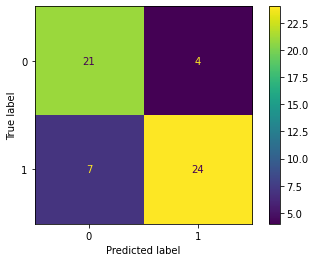

Métricas en train
Sensibilidad (Recall): 0.8888888888888888
Precisión: 0.8780487804878049
Accuracy: 0.8869047619047619
Score f1: 0.8834355828220859

Todas las métricas:
              precision    recall  f1-score   support

       False       0.90      0.89      0.89        87
        True       0.88      0.89      0.88        81

    accuracy                           0.89       168
   macro avg       0.89      0.89      0.89       168
weighted avg       0.89      0.89      0.89       168



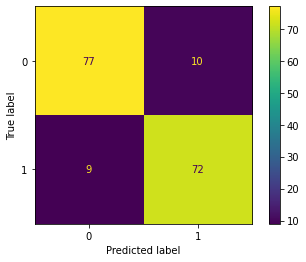

In [ ]:
# Propuesta 3: Continuación
print(f'Los parámetros del mejor modelo son: {grid.best_params_}')
print('')

# Se hace la predicción
y_pred = grid.predict(x_train)
y_pred_test = grid.predict(x_test)

# Métricas en test
print('Métricas en test')
display_metrics(y_test, y_pred_test)

# Métricas en train
print('Métricas en train')
display_metrics(y_train, y_pred)

Las métricas de train mejoraron un poco.

## Punto 2 (15 pts)

En la siguiente celda se muestran las matrices de confusión pertenecientes a dos modelos (A y B) diferentes entrenados sobre los mismos datos. Asuma para todas las preguntas la clase positiva como aquella con la etiqueta 1:


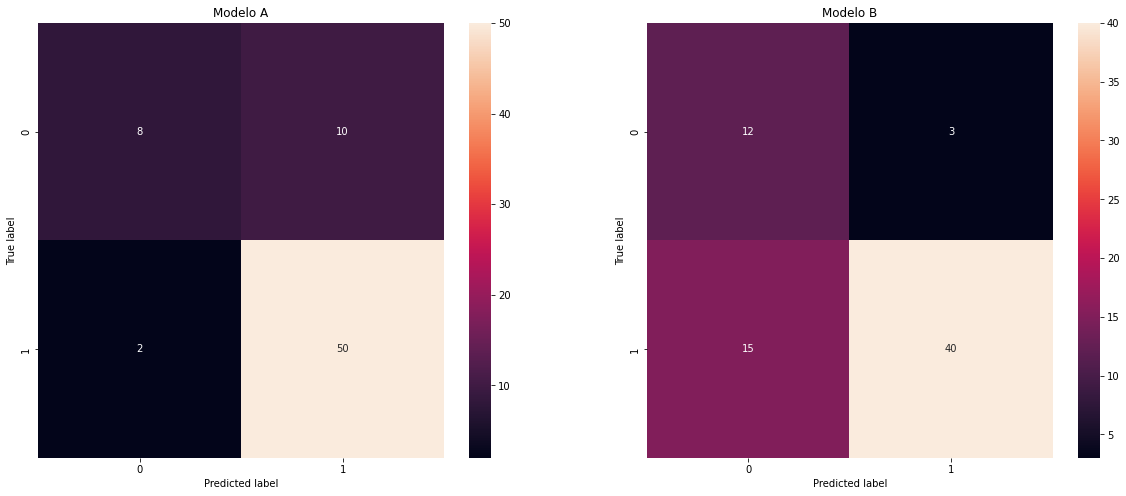

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)

disp_A = sns.heatmap(np.array([[8,10],[2,50]]),annot=True)
disp_A.plot()
disp_A.set_title('Modelo A')
disp_A.set_xlabel('Predicted label')
disp_A.set_ylabel('True label')

plt.subplot(1,2,2)
disp_B = sns.heatmap(np.array([[12,3],[15,40]]), annot=True)
disp_B.plot()
disp_B.set_title('Modelo B')
disp_B.set_xlabel('Predicted label')
disp_B.set_ylabel('True label')

plt.show()

2.1 Supongamos que queremos clasificar personas que poseen una enfermedad contagiosa mortal (clase positiva) de personas sanas (clase negativa). 

¿Cuál de los dos modelos sería mejor para este problema? Explique y justifíquelo a partir del cálculo de métricas (5pts).

El mejor modelo es el que tenga la mejor sensibilidad ya que estamos ante un caso grave de una enfermedad mortal, y lo que buscamos es minimizar los falsos negativos.

Sensibilidad = `TP / (TP + FN)`

La sensibilidad del modelo A es 50 / 50 + 2 = **0,9615**

La sensibilidad del modelo B es 40 / 40 + 15 = 0,7272

El mejor **modelo es el A**.

2.2 Proponga un escenario en el cual el modelo B se prefiere sobre el modelo A.
Explique y justifíquelo a partir del calculo de métricas (5 pts).

El modelo B se podría preferir sobre el A cuando tengamos un caso que no sea grave, por ejemplo el de un modelo de una campaña de marketing, que no sea una enfermedad ni nada por el estilo.

Podemos evaluar la métrica de precisión, lo que buscamos es minimizar los falsos positivos:

Precisión = `TP / (TP + FP)`

La precisión del modelo A es 50 / 50 + 10 = 0,8333

La precisión del modelo B es 40 / 40 + 3 = **0,9302**

El mejor **modelo es el B**.

2.3 Proponga un escenario en el cual ninguno de los modelos (A y B) tiene un desempeño satisfactorio.

Explique y justifiquelo a partir del calculo de métricas (5 pts).

Puede ser que los datos no esten balanceados y utilicemos el accuracy para determinar cuál es el mejor de los 2.

Accuracy = `TP + TN / TP + TN + FP + FN`

Accuracy del modelo A es 50 + 8 / 8 + 10 + 2 + 50 = 0,8285

Accuracy del modelo B es 40 + 12 / 12 + 3 + 15 + 40 = 0,7428

Al saber que las clases no están balanceadas que que el accuracy tampoco se acerca a 1 podríamos decir que no es posible seleccionar el modelo A ni el B.

## Punto 3 (25 pts)

3.1 Suponga que después de entrenar su modelo obtiene esta gráfica de evolución de la función de error en sus datos de entrenamiento y de validación.

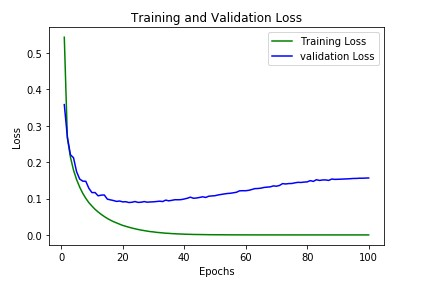

3.1.1	¿Segun la imagen que comportamiento se está evidenciando, expliquelo? (2.5 pts).

Se evidencia que en las primeras epochs hay underfitting ya que el error es muy alto y tanto en los datos de validación como en los de training el error es alto.

Luego, para las epochs entre 40 y 60 no hay un buen entrenamiento del modelo y el error no es similar.

Al final de la gráfica se puede observar que hay un poco de overfitting ya que los datos de training tienen muy poco error y los datos de validación están empezando a generar más error.

3.1.2	Liste 3 estrategias que le permita lograr el comportamiento de la siguiente imagen (2.5 pts).

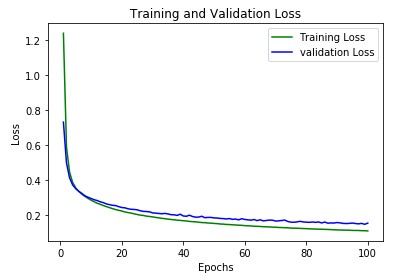

* Se puede tener una muy buena cantidad de datos con los que yo pueda separar una porción para test y otra para train y haga que mi modelo no se aprenda los datos de train.
* Contar con los datos completos, no descartar ninguno, y si hay nulos intentar llenarlos con los valores más reales posibles. Al descartar filas o columnas estamos haciendo que el modelo aprenda menos.
* Entrenar el modelo de forma adecuada para que el error siempre sea el mínimo posible.

3.2 Explique en máximo 5 líneas por que el Kernel radial tiende a hacer más sobreajuste que un Kernel polinomial de grado 3 para el método SVM (5 pts).


** Ingrese aquí la respuesta a la pregunta 3.2 **

3.3 Usted realiza utilizando la técnica de PCA una división en 4 componentes principales de unos datos. Obtiene esta imagen. Si puede usar solamente 2 componentes principales cuales escogería usted?  Y aproximadamente que porcentaje de la variación de los datos puede representar utilizando esa elección (5pts).

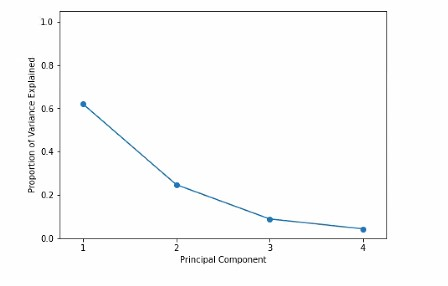

Seleccionaría los componentes 1 y 2 que me están garantizando la varianza más alta.

Puede representar un 80% del porcentaje de la varianza.

3.4 Asuma que estamos utilizando arboles de decisión y tenemos la siguiente tabla. Usted tiene que hacer el primer split para construir el árbol. Haga los cálculos pertinentes usando la impureza de Gini y diga qué característica escogería para el nodo raíz con base a dichos calculos.

**NOTA**: La columna verde corresponde a la variable target (10 pts).

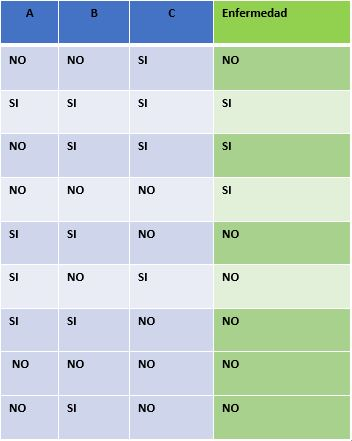

Evaluando la característica A con se tiene:

Tiene enfermedad:
* SI = 1
* NO = 3

Impureza de GINI = 1 - (1/(1+3))^2 - (3/(1+3))^2 = 0,375

No es A:

Tiene enfermedad:
* SI = 2
* NO = 3

Impureza de GINI = 1 - (2/(2+3))^2 - (3/(2+3))^2 = 0,48

Impureza de Gini total = (4/4+5) x 0,375 + (5/5+4) * 0,48 = 0,43333

Está casi cercano a 0,5, escogería otra característica que me asegure un mejor valor para Gini.



